# 다중 분류 (Human Activities)

- PCA 적용
- SVC, Decision Tree, Random Forest
- 학습데이터: train.csv
- 테스트: test.csv

In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [215]:
df = pd.read_csv('train.csv')
df.shape

(7352, 563)

In [216]:
df2 = pd.read_csv('test.csv')
df2.shape

(2947, 563)

In [217]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [218]:
df2.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,-0.705974,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.594944,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.640736,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.736124,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.846595,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,STANDING


In [219]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 31.6+ MB


In [220]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 12.7+ MB


In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,7352.0,0.274488,0.070261,-1.000000,0.262975,0.277193,0.288461,1.000000
tBodyAcc-mean()-Y,7352.0,-0.017695,0.040811,-1.000000,-0.024863,-0.017219,-0.010783,1.000000
tBodyAcc-mean()-Z,7352.0,-0.109141,0.056635,-1.000000,-0.120993,-0.108676,-0.097794,1.000000
tBodyAcc-std()-X,7352.0,-0.605438,0.448734,-1.000000,-0.992754,-0.946196,-0.242813,1.000000
tBodyAcc-std()-Y,7352.0,-0.510938,0.502645,-0.999873,-0.978129,-0.851897,-0.034231,0.916238
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",7352.0,-0.005981,0.477975,-1.000000,-0.376341,-0.000368,0.359368,0.996078
"angle(X,gravityMean)",7352.0,-0.489547,0.511807,-1.000000,-0.812065,-0.709417,-0.509079,1.000000
"angle(Y,gravityMean)",7352.0,0.058593,0.297480,-1.000000,-0.017885,0.182071,0.248353,0.478157
"angle(Z,gravityMean)",7352.0,-0.056515,0.279122,-1.000000,-0.143414,0.003181,0.107659,1.000000


In [222]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
tBodyAcc-mean()-X,2947.0,0.273996,0.060570,-0.592004,0.262075,0.277113,0.288097,0.671887
tBodyAcc-mean()-Y,2947.0,-0.017863,0.025745,-0.362884,-0.024961,-0.016967,-0.010143,0.246106
tBodyAcc-mean()-Z,2947.0,-0.108386,0.042747,-0.576184,-0.121162,-0.108458,-0.097123,0.494114
tBodyAcc-std()-X,2947.0,-0.613635,0.412597,-0.999606,-0.990914,-0.931214,-0.267395,0.465299
tBodyAcc-std()-Y,2947.0,-0.508330,0.494269,-1.000000,-0.973664,-0.790972,-0.105919,1.000000
...,...,...,...,...,...,...,...,...
"angle(tBodyGyroJerkMean,gravityMean)",2947.0,-0.017298,0.501311,-0.991096,-0.428375,-0.026726,0.394387,1.000000
"angle(X,gravityMean)",2947.0,-0.513923,0.509205,-0.984195,-0.829722,-0.729648,-0.545939,0.833180
"angle(Y,gravityMean)",2947.0,0.074886,0.324300,-0.913704,0.022140,0.181563,0.260252,1.000000
"angle(Z,gravityMean)",2947.0,-0.048720,0.241467,-0.949228,-0.098485,-0.010671,0.092373,0.973113


In [223]:
df.isna().sum()

,0
tBodyAcc-mean()-X,0
tBodyAcc-mean()-Y,0
tBodyAcc-mean()-Z,0
tBodyAcc-std()-X,0
tBodyAcc-std()-Y,0
...,...
"angle(X,gravityMean)",0
"angle(Y,gravityMean)",0
"angle(Z,gravityMean)",0
subject,0


In [224]:
df2.isna().sum()

,0
tBodyAcc-mean()-X,0
tBodyAcc-mean()-Y,0
tBodyAcc-mean()-Z,0
tBodyAcc-std()-X,0
tBodyAcc-std()-Y,0
...,...
"angle(X,gravityMean)",0
"angle(Y,gravityMean)",0
"angle(Z,gravityMean)",0
subject,0


In [225]:
X = df.drop('Activity', axis=1)
y = df['Activity']

In [226]:
X_test = df2.drop('Activity', axis=1)
y_test = df2['Activity']

In [227]:
X.shape, X_test.shape, y.shape, y_test.shape

((7352, 562), (2947, 562), (7352,), (2947,))

In [228]:
columns = X.columns
columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-skewness()', 'fBodyBodyGyroJerkMag-kurtosis()',
       'angle(tBodyAccMean,gravity)', 'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject'],
      dtype='object', length=562)

In [229]:
X = X.to_numpy()
y = y.to_numpy()
X_test = X_test.to_numpy()
y_test = y_test.to_numpy()

In [230]:
from sklearn.decomposition import PCA

In [231]:
pca = PCA(n_components=10, random_state=42)
X_p = pca.fit_transform(X)
X_test_p = pca.transform(X_test)

In [232]:
pca.get_feature_names_out()

array(['pca0', 'pca1', 'pca2', 'pca3', 'pca4', 'pca5', 'pca6', 'pca7',
       'pca8', 'pca9'], dtype=object)

In [233]:
from sklearn.preprocessing import StandardScaler

In [234]:
ss = StandardScaler()
X_s = ss.fit_transform(X_p)
X_test_s = ss.transform(X_test_p)

In [235]:
from sklearn.preprocessing import LabelEncoder

In [236]:
le = LabelEncoder()
y_e = le.fit_transform(y)
y_test_e = le.transform(y_test)

In [237]:
from sklearn.svm import SVC

In [238]:
clf = SVC(random_state=42)
clf.fit(X_s, y_e)

SVC(random_state=42)

In [239]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [240]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

In [241]:
def print_metrics(y_true, y_pred):
  acc = accuracy_score(y_true, y_pred)
  re = recall_score(y_true, y_pred,average='macro')
  pre = precision_score(y_true, y_pred,average='macro')
  f1 = f1_score(y_true, y_pred,average='macro')

  print('acc: ', acc)
  print('recall: ', np.around(re, 4))
  print('precision: ', np.around(pre, 4))
  print('f1: ', np.around(f1, 4))

  cfm = confusion_matrix(y_true, y_pred)
  s = sns.heatmap(cfm, annot=True, cmap='Blues', fmt='d', cbar=False)
  s.set(xlabel='Prediction', ylabel='Actual')
  plt.show()

In [242]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [243]:
clf2 = DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)
clf2.fit(X_s, y_e)

DecisionTreeClassifier(max_depth=3, min_samples_split=4, random_state=42)

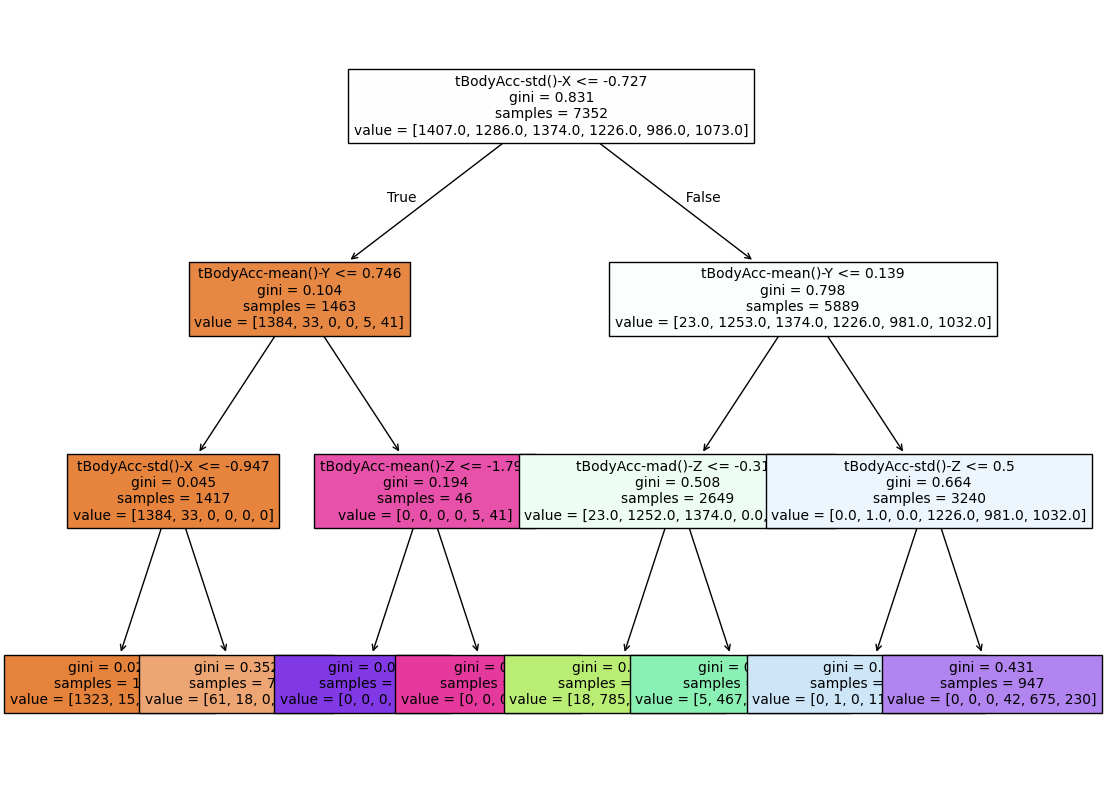

In [244]:
plt.figure(figsize=(13, 10))
plot_tree(clf2, feature_names=columns, filled=True, fontsize=10)
plt.show()

In [245]:
from sklearn.ensemble import RandomForestClassifier

In [246]:
clf3 = RandomForestClassifier(n_estimators=100, random_state=42)
clf3.fit(X_s, y_e)

RandomForestClassifier(random_state=42)

In [247]:
y_pred = clf.predict(X_test_s)
y_pred2 = clf2.predict(X_test_s)
y_pred3 = clf3.predict(X_test_s)

acc:  0.8537495758398371
recall:  0.8484
precision:  0.8607
f1:  0.8498


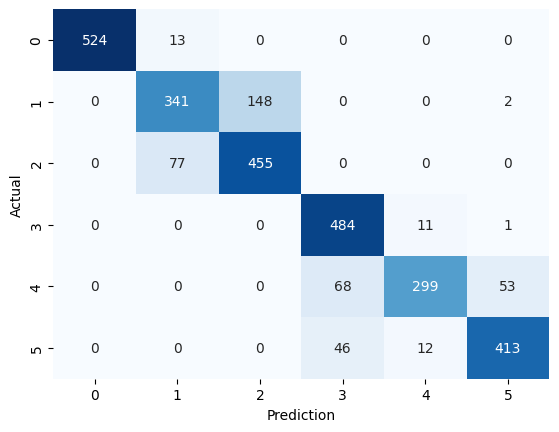

In [248]:
print_metrics(y_test_e, y_pred)

acc:  0.6603325415676959
recall:  0.6473
precision:  0.5849
f1:  0.5997


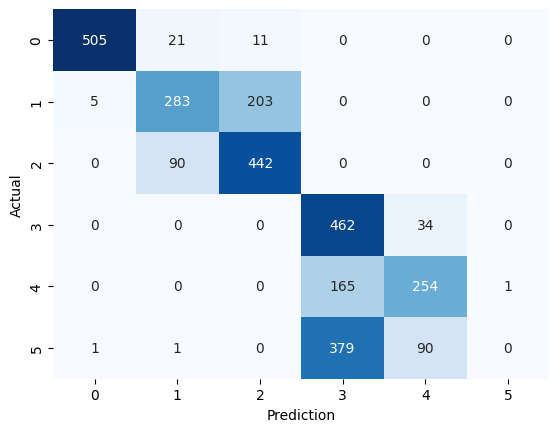

In [249]:
print_metrics(y_test_e, y_pred2)

acc:  0.8581608415337632
recall:  0.8537
precision:  0.8635
f1:  0.8553


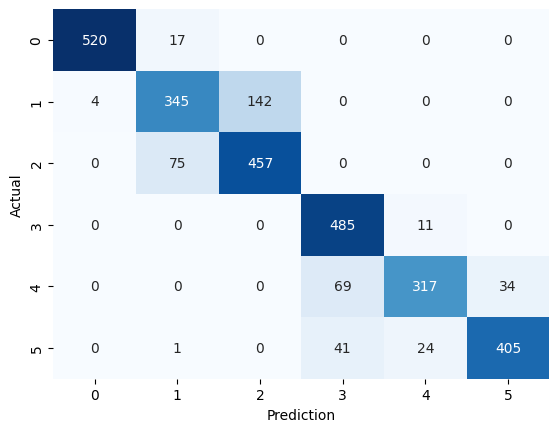

In [250]:
print_metrics(y_test_e, y_pred3)